# KEGG pathways: Accessing, plotting, and data analysis

Based on the bioconductor vignettes:

[KEGGgraph: Application Examples](https://bioconductor.org/packages/release/bioc/vignettes/KEGGgraph/inst/doc/KEGGgraphApp.pdf) by Jitao David Zhang (October 30, 2017)

and [Bioconductor’s SPIA package](http://bioconductor.org/packages/release/bioc/vignettes/SPIA/inst/doc/SPIA.pdf)
Adi L. Tarca, Purvesh Khatri and Sorin Draghici (October 30, 2017)

## install KEGGgraph and other bioconductor packages needed for this demonstration

In [4]:
source("https://bioconductor.org/biocLite.R")

Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help


In [8]:
# install KEGGgraph for manipulating KEGG pathways
biocLite("KEGGgraph")

# install SPIA for Signaling Pathway Impact Analysis
biocLite("SPIA")

BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.0 (2017-04-21).
Installing package(s) ‘KEGGgraph’



The downloaded binary packages are in
	/var/folders/2x/_2l4dz2s1fx_y26kd57tslxr0000gn/T//RtmpWZzuI6/downloaded_packages


Old packages: 'curl'
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.0 (2017-04-21).
Installing package(s) ‘SPIA’



The downloaded binary packages are in
	/var/folders/2x/_2l4dz2s1fx_y26kd57tslxr0000gn/T//RtmpWZzuI6/downloaded_packages


Old packages: 'curl'


In [7]:
# install libraries for visualization
biocLite("graph")
biocLite('Rgraphviz')

BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.0 (2017-04-21).
Installing package(s) ‘graph’



The downloaded binary packages are in
	/var/folders/2x/_2l4dz2s1fx_y26kd57tslxr0000gn/T//RtmpWZzuI6/downloaded_packages


Old packages: 'curl'
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.0 (2017-04-21).
Installing package(s) ‘Rgraphviz’



The downloaded binary packages are in
	/var/folders/2x/_2l4dz2s1fx_y26kd57tslxr0000gn/T//RtmpWZzuI6/downloaded_packages


Old packages: 'curl'


In [6]:
# install a database to allow mapping of microarray probesets to NCBI and UCSC gene identifiers
biocLite("hgu133plus2.db")

BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.0 (2017-04-21).
Installing package(s) ‘hgu133plus2.db’
installing the source package ‘hgu133plus2.db’

Old packages: 'curl'


In [5]:
biocLite("AnnotationDbi")
biocLite("RBGL")

BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.0 (2017-04-21).
Installing package(s) ‘AnnotationDbi’



The downloaded binary packages are in
	/var/folders/2x/_2l4dz2s1fx_y26kd57tslxr0000gn/T//RtmpWZzuI6/downloaded_packages


Old packages: 'curl'
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.0 (2017-04-21).
Installing package(s) ‘RBGL’



The downloaded binary packages are in
	/var/folders/2x/_2l4dz2s1fx_y26kd57tslxr0000gn/T//RtmpWZzuI6/downloaded_packages


Old packages: 'curl'


## load KGML pathway file
we will use the human colorectal cancer pathway in this demonstration, to show how to visualize KGML files. This pathway has the ID [hsa05210](http://www.kegg.jp/kegg-bin/show_pathway?hsa05210), and on the KEGG website is rendered thus:

![hsa05210](http://www.kegg.jp/kegg/pathway/hsa/hsa05210.png)

Remember, only the green-highlighted rectangles indicate gene products in the human pathway. The white boxes indicate gene products that are found in this pathway in other organisms. 

In [1]:
# load the KEGGgraph library and its functions:
library(KEGGgraph)

Warning message:
“package ‘KEGGgraph’ was built under R version 3.4.2”
Attaching package: ‘KEGGgraph’

The following object is masked from ‘package:graphics’:

    plot



Now we will load the KGML file for hsa00010 from file `hsa00010.xml`. This file was downloaded from ftp://ftp.bioinformatics.jp/kegg/xml/kgml/non-metabolic/organisms/hsa.tar.gz, which unpacks to all the non-metabolic pathways and their image files. The library has an academic subscription to KEGG, making the FTP database of KEGG files **freely accessible to anyone from within the WCM network**.

In [10]:
demoKGMLfile <- "xml-nonmet-hsa/hsa05210.xml"
demoGraph <- parseKGML2Graph(demoKGMLfile, genesOnly=FALSE)

In [11]:
head(nodes(demoGraph))

[1] "hsa:1630" "hsa:836"  "hsa:7040" "hsa:7042" "hsa:7043" "hsa:5290"

Another option is to use `retrieveKGML` to download the KGML file. This requires knowing the pathway ID and the three-letter organism code. This will save the KGML to the file specified.

In [12]:
FileName <- "hsa05210-web.xml"
retrieveKGML(pathwayid="05210", organism="hsa", destfile=FileName)

Once you have the KGML pathway loaded by parseKGML2Graph, you can visualize the nodes and their connections:

In [15]:
# to visualize the graph, we will use the Rgraphviz library:
library(Rgraphviz)

nodeInfo <- getKEGGnodeData(demoGraph)
nodeType <- sapply(nodeInfo, getType)
makeNodeRenderAttrs <- function(g, label=nodes(g),
                                shape="ellipse", fill="#e0e0e0",...) {
  rv <- list(label=label, shape=shape, fill=fill, ...)
  nA <- nodeRenderInfo(g)
  for(i in seq(along=rv)) {
    if (length(rv[[i]]) == 1) {
      rv[[i]] <- rep(rv[[i]], numNodes(g))
    } else {
      if (length(rv[[i]]) != numNodes(g))
        stop("Attribute vector must have as many elements as 'g' has nodes.")
    }
    names(rv[[i]]) <- nodes(g)
    nA[[ names(rv)[[i]] ]] <- rv[[i]]
  }
  nodeRenderInfo(g) <- nA
  return(g)
} 

Warning message in .subtypeDisplay(object):
“Given subtype 'missing interaction' is not found!
”Warning message in .subtypeDisplay(object):
“Given subtype 'missing interaction' is not found!
”Warning message in .subtypeDisplay(object):
“Given subtype 'missing interaction' is not found!
”Warning message in .subtypeDisplay(object):
“Given subtype 'missing interaction' is not found!
”Warning message in .subtypeDisplay(object):
“Given subtype 'missing interaction' is not found!
”Warning message in .subtypeDisplay(object):
“Given subtype 'missing interaction' is not found!
”Warning message in .subtypeDisplay(object):
“Given subtype 'missing interaction' is not found!
”Warning message in .subtypeDisplay(object):
“Given subtype 'missing interaction' is not found!
”Warning message in .subtypeDisplay(object):
“Given subtype 'missing interaction' is not found!
”Warning message in .subtypeDisplay(object):
“Given subtype 'missing interaction' is not found!
”Warning message in .subtypeDisplay(objec

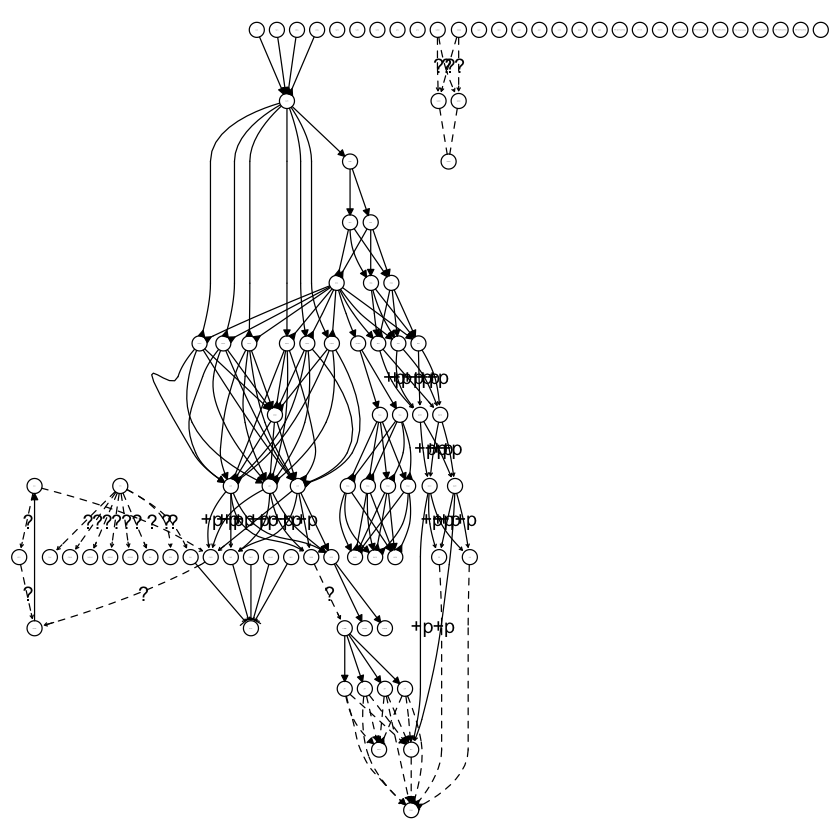

In [16]:
demoDrawn <- plotKEGGgraph(demoGraph)

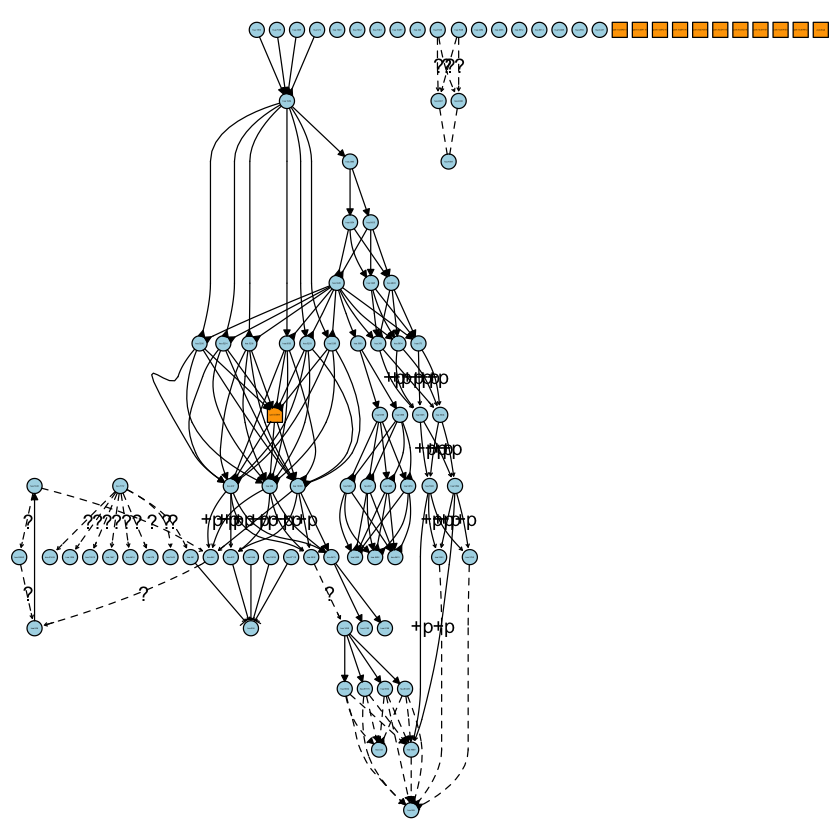

In [17]:
# add some helpful coloring and shapes to differentiate elements
demoDrawnRefine <- makeNodeRenderAttrs(demoDrawn, fill=ifelse(nodeType=="gene", "lightblue", "orange"),
                                      shape=ifelse(nodeType=="gene", "ellipse","rectangle"))

renderGraph(demoDrawnRefine)

## load Signaling Pathway Impact Analysis (SPIA)

In [20]:
library(SPIA)

In [21]:
if(require(SPIA)) {
    data(colorectalcancer,package="SPIA")
    } else {
    data(colorectalcancerSPIA, package="KEGGgraph")
    }

In [22]:
data(colorectalcancer)

In [23]:
# view the first rows of the analysed data set "top"
head(top)

,ID,logFC,AveExpr,t,P.Value,adj.P.Val,B,ENTREZ
10738,201289_at,5.960206,6.226928,23.94388,1.789221e-17,9.782565e-13,25.40124,3491
18604,209189_at,5.143502,7.487305,17.42995,1.560212e-14,2.843486e-10,21.02120,2353
11143,201694_s_at,4.148081,7.038281,16.46040,5.153117e-14,7.043667e-10,20.14963,1958
10490,201041_s_at,2.429889,9.594413,14.06891,1.293706e-12,1.414667e-08,17.66883,1843
10913,201464_x_at,1.531126,8.221044,10.98634,1.685519e-10,1.151947e-06,13.61189,3725
11463,202014_at,1.429269,5.327647,10.45906,4.274251e-10,2.418771e-06,12.80131,23645


We only consider the probes annotated with EntrezGeneID and differentially expressed
with FDR p-value less than 0.05.

In [26]:
# load affymetrix array annotation data 
library(hgu133plus2.db)

# get list of all differentially expressed genes (DEGs):
x <- hgu133plus2ENTREZID
top$ENTREZ <- unlist(as.list(x[top$ID]))
top <- top[!is.na(top$ENTREZ),]
top <- top[!duplicated(top$ENTREZ),]
tg1 <- top[top$adj.P.Val < 0.05,]

## SPIA analysis

Documentation can be found [here](http://bioconductor.org/packages/release/bioc/vignettes/SPIA/inst/doc/SPIA.pdf).

The SPIA algorithm takes as input two vectors: log2 fold changes of differentially expressed
genes (DE_Colorectal) and those of all EntrezGeneID annotated genes (ALL_Colorectal),
and returns a table of pathways ranked from the most to the least significant. The results
show that Colorectal cancer pathway (ID:05210) is significantly activated (ranked the 5th
of the result table). To visualize the results, we visualize the pathway with differentially
expressed genes marked with color

### Create required gene lists for SPIA
Now create a dataframe of differentially expressed genes and their log fold-change values, and a dataframe of all Entrez genes on the Affymetrix array:

In [27]:
DE_Colorectal <- tg1$logFC
names(DE_Colorectal) <- as.vector(tg1$ENTREZ)
ALL_Colorectal <- top$ENTREZ

In [28]:
DE_Colorectal[1:5]

3491     2353     1958     1843     3725 
5.960206 5.143502 4.148081 2.429889 1.531126

In [29]:
ALL_Colorectal[1:5]

[1] "3491" "2353" "1958" "1843" "3725"

### Run SPIA to identify which pathways are most impacted. 

NB: The default KEGG data that was preprocessed for SPIA analysis and is included for the hsa and mmu organisms was downloaded from KEGG’s website on: 09/07/2012. It is thus outdated, but can be updated using the FTP xml files.

To update the pathways available for SPIA, download the relevant pathway KGML files from the FTP site, then use the following code: 

```
xmldir <- "path_to_kgml_files"
org <- "organism_code"  # eg "hsa"
makeSPIAdata(kgml.path=xmldir,organism=org,out.path="./")
```

Then, when running the analysis, specify the directory to the prepared data files with the `data.dir` parameter:

```
res <- spia(de=DE_Colorectal, all=ALL_Colorectal, organism="hsa",data.dir="./")
```

In [30]:
# This code takes a couple of minutes to run

# pathway analysis based on combined evidence; 
# use nB=2000 or more for more accurate results
res=spia(de=DE_Colorectal,all=ALL_Colorectal,organism="hsa",nB=2000,plots=FALSE,beta=NULL,combine="fisher",verbose=FALSE)

#make the output fit this screen
res$Name=substr(res$Name,1,10)

#show first 15 pathways, omit KEGG links
res[1:20,-12]

Name,ID,pSize,NDE,pNDE,tA,pPERT,pG,pGFdr,pGFWER,Status
Parkinson',05012,105,54,2.350590e-12,-10.0363921,0.130000,9.111251e-12,1.094120e-09,1.248241e-09,Inhibited
Alzheimer',05010,144,67,2.472128e-12,-6.0434585,0.221000,1.597255e-11,1.094120e-09,2.188239e-09,Inhibited
Focal adhe,04510,174,61,6.479609e-06,98.1717167,0.000005,8.149055e-10,3.721402e-08,1.116421e-07,Activated
ECM-recept,04512,72,25,3.783501e-03,21.9758828,0.000005,3.553309e-07,1.217008e-05,4.868033e-05,Activated
Huntington,05016,163,61,5.380245e-07,-3.0886592,0.239000,2.168847e-06,5.689913e-05,2.971320e-04,Inhibited
PPAR signa,03320,64,30,2.224597e-06,-3.1513465,0.067000,2.491933e-06,5.689913e-05,3.413948e-04,Inhibited
Axon guida,04360,117,46,2.734023e-06,9.7363971,0.253000,1.050296e-05,2.055580e-04,1.438906e-03,Activated
Pathways i,05200,294,82,1.635655e-03,63.2558057,0.005000,1.039788e-04,1.780637e-03,1.424510e-02,Activated
Glutamater,04724,113,32,3.118389e-02,-11.0732368,0.009000,2.575959e-03,3.782507e-02,3.529064e-01,Inhibited
Small cell,05222,73,20,1.011282e-01,25.9414706,0.003000,2.760954e-03,3.782507e-02,3.782507e-01,Activated


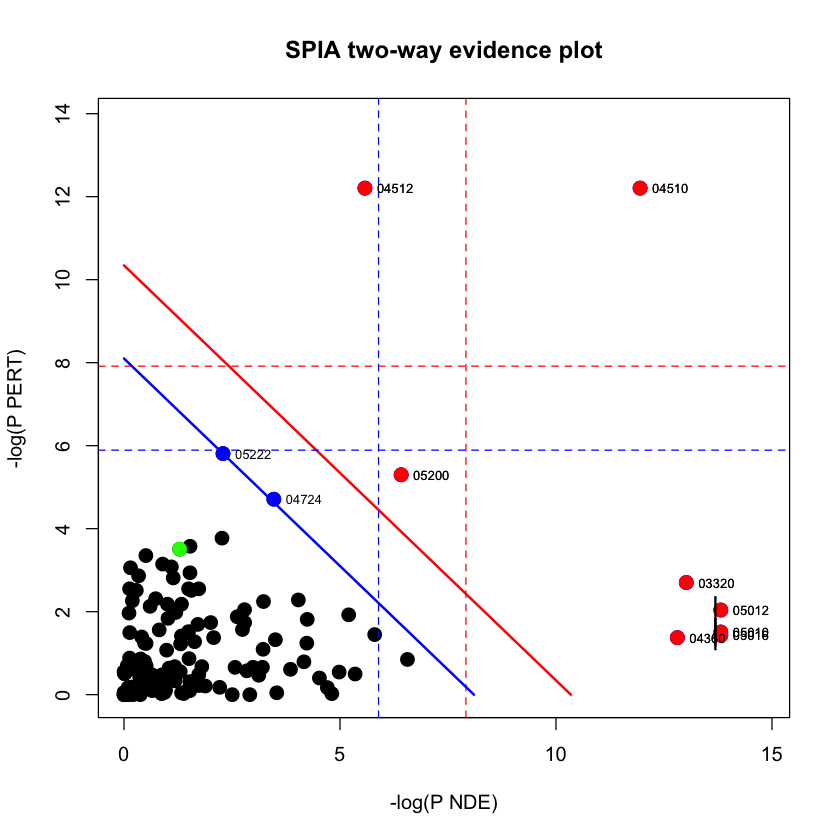

In [31]:
plotP(res,threshold=0.05)
points(I(-log(pPERT))~I(-log(pNDE)),data=res[res$ID=="05210",],col="green",pch=19,cex=1.5)

We now have a look to see how many of the genes in our pathway are differentially expressed from our microarray data.

In [32]:
# load KEGGgraph object:
colFile <- "xml-nonmet-hsa/hsa05210.xml"
g <- parseKGML2Graph(colFile)

# get number of differentially expressed genes:
deKID <- translateGeneID2KEGGID(names(DE_Colorectal))

# get number of genes from microarray:
allKID <- translateGeneID2KEGGID(ALL_Colorectal)

# create binary list representing DEGs and non-DEGs:
isDiffExp <- nodes(g) %in% deKID

# print output:
sprintf("%2.2f%% genes in hsa05210 are differentially-expressed", mean(isDiffExp)*100)

[1] "24.42% genes in hsa05210 are differentially-expressed"

### Visualize the differential expression on the network

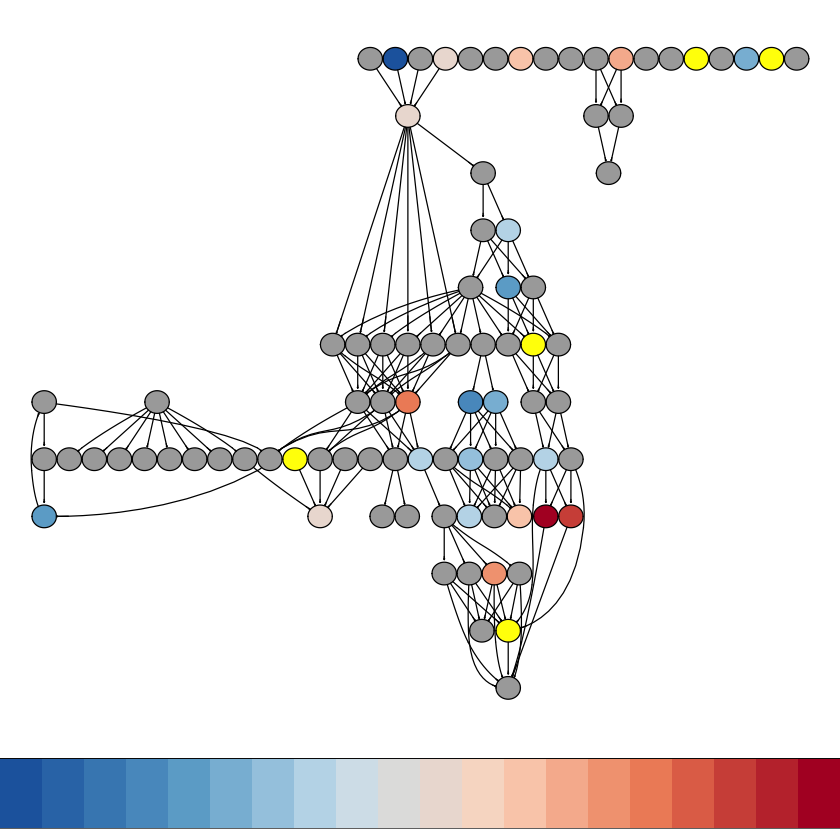

In [35]:
library(RColorBrewer)
library(org.Hs.eg.db)
library(RBGL)
library(grid)
library(Rgraphviz)

# create color palette for displaying log fold change differences
ar <- 20
cols <- rev(colorRampPalette(brewer.pal(6, "RdBu"))(ar))

# match the node names from DE_Colorectal to the KEGG IDs
logfcs <- DE_Colorectal[match(nodes(g), deKID)]
names(logfcs) <- nodes(g)

# set null values to zero
logfcs[is.na(logfcs)] <- 0

incol <- round((logfcs+2)*5); incol[incol>ar] <- ar

# identify nodes in KEGG graph not in microarray
undetected <- !nodes(g) %in% allKID

# color undetected nodes yellow, and nodes with no fold change grey
logcol <- cols[incol]; logcol[logfcs==0] <- "darkgrey"; logcol[undetected] <- "yellow"
names(logcol) <- names(logfcs)

# set values of the nodes for our graph g:
nA <- makeNodeAttrs(g, fillcolor=logcol, label="", width=10, height=1.2)
par(mar=c(3,5,0,5), mgp=c(0,0,0))
layout(mat=matrix(c(rep(1,8),2), ncol=1, byrow=TRUE))

plot(g, "dot", nodeAttrs=nA)
image(as.matrix(seq(1,ar)), col=cols, yaxt="n", xaxt="n")
mtext("down-regulation", side=1,  at=0, line=1)
mtext("up-regulation", side=1,  at=1, line=1)

In the above figure, we observe that:

 Not all the genes are connected with each other, 40.4761904761905% (34/84) nodes
in the pathway have a degree of 0 – they are not conencted to any other node.
There are several reasons for this. One of them is the genes with genetic alterations
are indicated in the pathway map, but not interweaved into the pathway (cf. http:
//www.genome.jp/dbget-bin/show_pathway?hsa05210). Another important factor
is that in some pathways, especially human disease pathways, KEGG records genes
involved in the disease but does not provide any edge in that pathway, although
one can find their interaction partners in other pathways (e.g., Grb2 has no edges in
colorectal cancer pathway, however in other maps including MAPK signaling pathway,
both up- and down-stream interactors are found). One solution to the later problem
is to merge (union) the related pathways together, to this end KEGGgraph provides
the function mergeKEGGgraphs.

 From the visualization above, it is difficult to recognize any patterns. To examine the
pathway in more details, it is necessary to use Divide and Conquer strategy, namely
to subset the graph into subgraphs. To this end KEGGgraph provides the function
subKEGGgraph, which maintains the KEGG information while subsetting the graph.

In [36]:
# get degree of each node (how many other nodes it is connected to)
gDeg <- degree(g)

# identify unconnected nodes (degree 0)
gIsSingle <- gDeg[[1]] + gDeg[[2]] == 0
options(digits=3)

# translate KEGG identifiers (KEGGID) into Entrez GeneID
gGeneID <- translateKEGGID2GeneID(nodes(g))

# translate Entrez GeneID to gene symbol
gSymbol <-  sapply(gGeneID, function(x) mget(x, org.Hs.egSYMBOL, ifnotfound=NA)[[1]])

# create lists of up- and down-regulated genes
isUp <- logfcs > 0
isDown <- logfcs < 0
singleUp <- isUp & gIsSingle
singleDown <- isDown & gIsSingle

List which genes are up or down regulated:

In [37]:
gSymbol[isUp==TRUE]

7043     5602     3725     2353      596    83439    10000     7048 
 "TGFB3" "MAPK10"    "JUN"    "FOS"   "BCL2" "TCF7L1"   "AKT3" "TGFBR2" 
    1956      374 
  "EGFR"   "AREG"

In [38]:
gSymbol[isDown==TRUE]

836    5599    5879    5594   54205    2932    5898    5899    4893    6655 
"CASP3" "MAPK8"  "RAC1" "MAPK1"  "CYCS" "GSK3B"  "RALA"  "RALB"  "NRAS"  "SOS2" 
   7039 
 "TGFA"

### Generate subgraph of all upregulated genes and their immediate neighbors

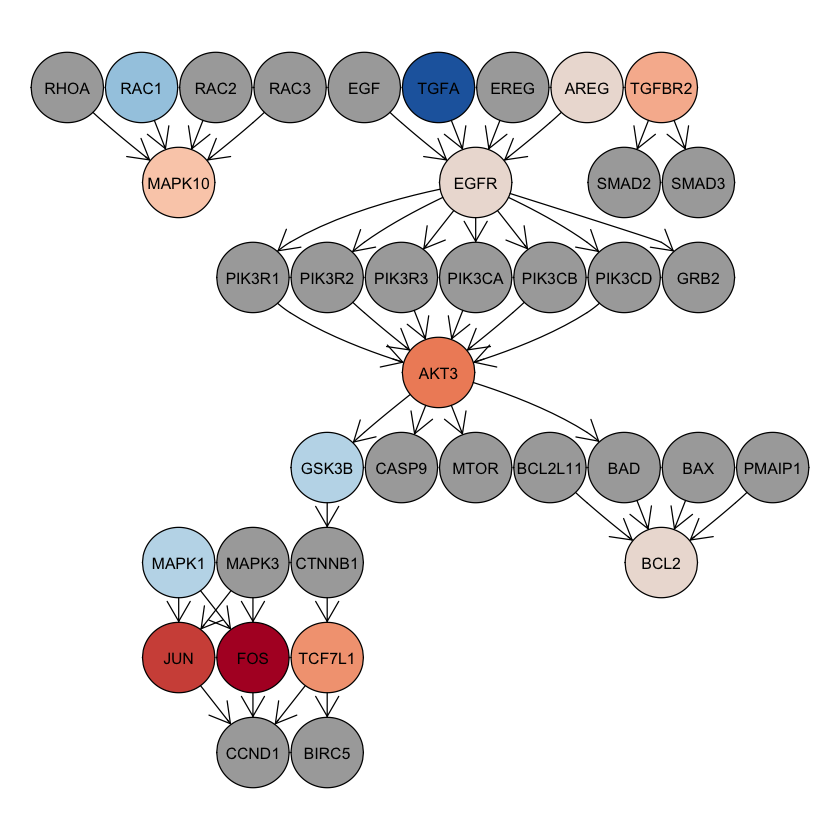

In [39]:
# get KEGG IDs for upregulated genes:
ups <- nodes(g)[logfcs > 0]

# get the neighbours of the up-regulated genes:
upNs <- unique(unlist(neighborhood(g, ups, return.self=TRUE)))

# create subgraph:
upSub <- subKEGGgraph(upNs, g)

# remove nodes in subgraph with zero connections
upNeighbor <- nodes(upSub)[sapply(neighborhood(upSub, nodes(upSub)), length)>0]
upNeighbor <- setdiff(upNeighbor, nodes(g)[undetected])
upSub <- subKEGGgraph(upNeighbor, upSub)

# translate KEGG identifiers (KEGGID) into Entrez GeneID
upSubGID <- translateKEGGID2GeneID(nodes(upSub))

# translate Entrez GeneID to gene symbol
upSymbol <- gSymbol[upSubGID]

# plot subgraph
upnA <- makeNodeAttrs(upSub, fillcolor=logcol[nodes(upSub)], label=upSymbol, fixedsize=TRUE, width=10, height=10, font=20)
plot(upSub, "dot", nodeAttrs=upnA)


We can use degree centrality (the sum of in- and out-degree of each node) as a measure
of the relative importance of each node compared to others. In this graph, 8 nodes have an degree equal or larger than three (in decreasing order: _AKT3, TCF7L1, CCND1, FOS,
MAPK3, MAPK1, JUN, MAPK10_), and 5 of them are upreguated to different extent.
This reinforces the conclusion of SPIA that the pathway is activated - it seems that the
relatively important nodes are up-regulated. Especially we note the upregulation of _Jun_
and _Fos_, two transcription factors with many targeted genes, even though their up-stream interactors (_MAPK3_ and _MAPK1_) in this pathway map are either not significantly differentially expressed or
slightly down-regulated (_MAPK1_, logFC=-0.381).

Further analysis could done, for example, by merging the colorectal pathway with
linked pathways (Wnt signaling, apoptosis, etc) and investigate the graph characteristics
of differnetially expressed genes and their links.

In [9]:
sessionInfo()

R version 3.4.0 (2017-04-21)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS  10.13.3

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.4/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.4/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] BiocInstaller_1.28.0 KEGGgraph_1.38.0    

loaded via a namespace (and not attached):
 [1] XML_3.98-1.10       digest_0.6.15       crayon_1.3.4       
 [4] IRdisplay_0.4.4     repr_0.12.0         jsonlite_1.5       
 [7] stats4_3.4.0        magrittr_1.5        evaluate_0.10.1    
[10] graph_1.56.0        stringi_1.1.7       uuid_0.1-2         
[13] IRkernel_0.8.6.9000 tools_3.4.0         stringr_1.3.0      
[16] parallel_3.4.0      compiler_3.4.0      BiocGenerics_0.24.0
[19] pbdZMQ_0.3-2       